In [1]:
import os
from data import *
from preprocess import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.color import label2rgb
from scipy import stats
from skimage.filters import laplace
from scipy.ndimage import binary_dilation, binary_erosion
from skimage.measure import perimeter

In [2]:
is_jpg = lambda x: x.split('.')[-1] == 'jpg'
is_tif = lambda x: x.split('.')[-1] == 'tif'
folder = 'dataset_original'
files = os.listdir(folder)
imgs = np.stack([get(jpg_file, folder) for jpg_file in filter(is_jpg, files)])
masks = np.stack([get(tif_file, folder) for tif_file in filter(is_tif, files)]).astype(bool)
inner = [img[mask] for img, mask in zip(imgs, masks)]
outter = [img[~mask] for img, mask in zip(imgs, masks)]

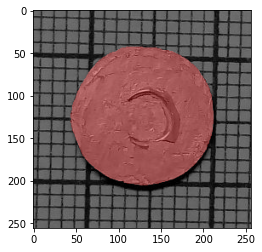

In [3]:
i = np.random.randint(len(imgs))
plt.imshow(label2rgb(masks[i], imgs[i]))

In [4]:
def hist(func):
    A = list(map(func, inner))
    B = list(map(func, outter))
    bins = np.histogram(np.hstack((A, B)), bins=20)[1]
    plt.hist(A, bins, alpha=0.6, label='amostra')
    plt.hist(B, bins, alpha=0.6, label='papel')
    plt.legend()
    plt.xlabel(func.__name__)
    plt.show()

def scatter(func1, func2, show=True):
    plt.scatter(list(map(func1, inner)), list(map(func2, inner)), alpha=0.6, label='amostra')
    plt.scatter(list(map(func1, outter)), list(map(func2, outter)), alpha=0.6, label='papel')
    plt.legend()
    plt.xlabel(func1.__name__)
    plt.ylabel(func2.__name__)
    if show: plt.show()

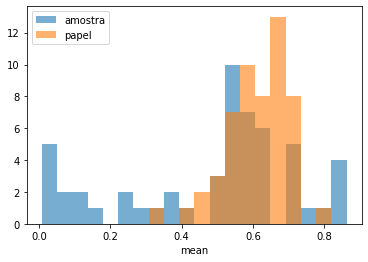

In [5]:
hist(np.mean)

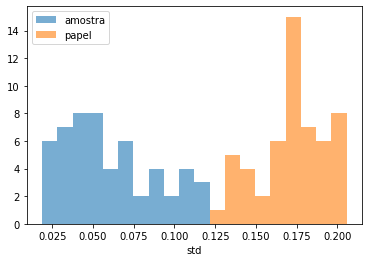

In [6]:
hist(np.std)

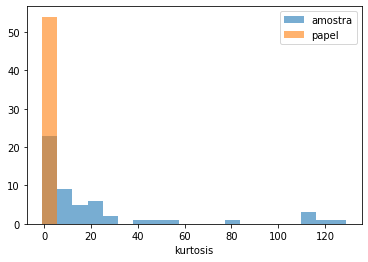

In [7]:
hist(stats.kurtosis)

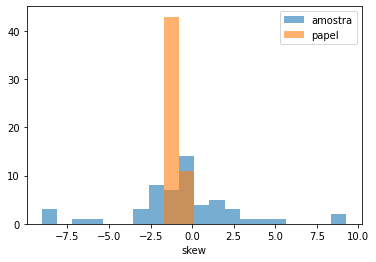

In [8]:
hist(stats.skew)

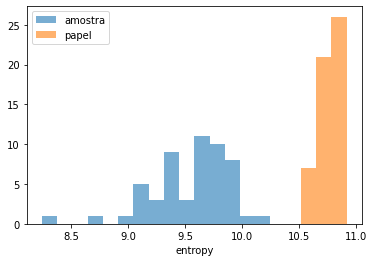

In [9]:
hist(stats.entropy)

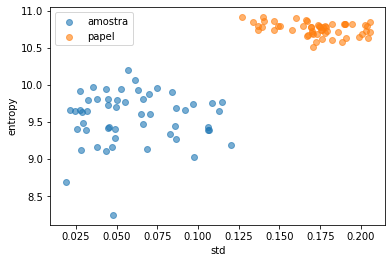

In [10]:
scatter(np.std, stats.entropy)